In [1]:
import pandas as pd

In [2]:
civ_df = pd.read_csv('Violence_against_civilians2012_thru_2019.csv')
civ_df

,Unnamed: 0,actor1,actor2,admin1,admin2,admin3,assoc_actor_1,assoc_actor_2,country,data_id,...,location,longitude,notes,region,source,source_scale,sub_event_type,time_precision,timestamp,year
0,0,B-18: Barrio-18,Civilians (El Salvador),La Libertad,Huizucar,NaN,NaN,NaN,El Salvador,6943236,...,Huizucar,-89.2383,On 31th December 2019 in Huizucar (La Libertad...,Central America,El Salvador.com,National,Attack,1,1582839958,2019
1,1,Unidentified Gang (Mexico),Civilians (Mexico),Michoacan,Cuitzeo,NaN,NaN,NaN,Mexico,6958095,...,Cuitzeo del Porvenir,-101.1396,"On 31 December 2019, in Chupicuaro community, ...",Central America,La Voz de Michoacan,Subnational,Attack,2,1582840326,2019
2,2,Unidentified Gang and/or Police Militia,Civilians (Brazil),Pernambuco,Sertania,NaN,NaN,NaN,Brazil,6947603,...,Sertania,-37.2684,"On 30 December 2019, in Sertania, Pernambuco, ...",South America,G1,National,Attack,2,1582840217,2019
3,3,Police Forces of Kenya (2013-),Civilians (Kenya),Kilifi,Kilifi North,Dabaso,NaN,NaN,Kenya,6713368,...,Watamu,40.0209,"On December 31 2019, a suspected Al Shabaab re...",Eastern Africa,Daily Nation (Kenya),National,Attack,1,1578512391,2019
4,4,Unidentified Gang (Mexico),Civilians (Mexico),Morelos,Amacuzac,NaN,NaN,Women (Mexico); Government of Mexico (2018-),Mexico,6926873,...,Amacuzac,-99.3695,"On 31 December 2019, in Amacuzac, Morelos, a w...",Central America,El Sol de Acapulco; La Verdad,National,Attack,2,1582839780,2019
5,5,Unidentified Armed Group (Mexico),Civilians (Mexico),Veracruz,Veracruz,NaN,NaN,NaN,Mexico,6926874,...,Veracruz,-96.1530,"On 31 December 2018, in the state of Veracruz,...",Central America,E-Consulta; Sintesis,National,Abduction/forced disappearance,1,1582839780,2019
6,6,Unidentified Armed Group (Mexico),Civilians (Mexico),Chihuahua,Juarez,NaN,NaN,NaN,Mexico,6957604,...,Ciudad Juarez,-106.4850,"On 31 December 2019, Colonia Felipe Angeles, C...",Central America,La Verdad,National,Attack,2,1582840325,2019
7,7,Unidentified Armed Group (Mexico),Civilians (Mexico),Hidalgo,Nopala de Villagran,NaN,NaN,NaN,Mexico,6956847,...,Nopala de Villagran,-99.6454,"On 31 December 2019, in Nopala de Villagran, H...",Central America,La Silla Rota,National,Attack,2,1582840323,2019
8,8,Hindu Militia (India),Civilians (India),Bihar,Patna,Patna,Hindu Group (India),Muslim Group (India),India,6715184,...,Patna,85.1356,"On 31 December, a Muslim teenager, who was mis...",Southern Asia,Indian Express,National,Attack,1,1578514388,2019
9,9,CNDD-FDD-Imbonerakure: National Council for th...,Civilians (Burundi),Karuzi,Buhiga,Buhiga,NaN,Students (Burundi); Christian Group (Burundi),Burundi,6718768,...,Rwingoma,30.1592,"On 31 December 2019, Imbonerakure beat up two ...",Eastern Africa,League Iteka,National,Attack,1,1578943802,2019


In [3]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
loc = civ_df[["latitude", "longitude"]]
loc

,latitude,longitude
0,13.5894,-89.2383
1,19.9682,-101.1396
2,-8.0694,-37.2684
3,-3.3543,40.0209
4,18.6000,-99.3695
5,19.1903,-96.1530
6,31.7465,-106.4850
7,20.2519,-99.6454
8,25.5941,85.1356
9,-3.0451,30.1592


In [4]:
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

neigh = NearestNeighbors(n_neighbors = 2)
nbrs = neigh.fit(loc)
distances, indices = nbrs.kneighbors(loc)

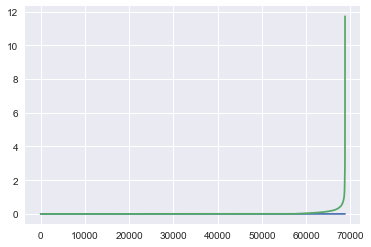

In [5]:
%matplotlib inline
distances = np.sort(distances, axis = 0)
distanaces = distances[:,1]
plt.plot(distances)

In [6]:
db = DBSCAN(eps = .5, min_samples = 10).fit(loc)
label = db.labels_
print (label[500:600])
civ_df['Clus_Db']= label

[ 26  40  87 273  15  -1   6   6  77   1  88   1   8  88   1   6  50  66
  66  14  14  29  44   1   8   8   8  15  56  56  43  89   5  63   8   6
   0   6  40  48  62  90  15   1  -1  47  25  44  91  40  -1  77  14  29
   0   1  26  19  58   6   5  92  66  -1  14   6   5  93  -1   5  35   6
  29   5   8   5   0  14  19  44  -1  15  94  95  19  28  32  -1  56  40
  -1  96  97   1  32   1  47   6  36  51]


In [9]:
civ_df

,Unnamed: 0,actor1,actor2,admin1,admin2,admin3,assoc_actor_1,assoc_actor_2,country,data_id,...,longitude,notes,region,source,source_scale,sub_event_type,time_precision,timestamp,year,Clus_Db
0,0,B-18: Barrio-18,Civilians (El Salvador),La Libertad,Huizucar,NaN,NaN,NaN,El Salvador,6943236,...,-89.2383,On 31th December 2019 in Huizucar (La Libertad...,Central America,El Salvador.com,National,Attack,1,1582839958,2019,0
1,1,Unidentified Gang (Mexico),Civilians (Mexico),Michoacan,Cuitzeo,NaN,NaN,NaN,Mexico,6958095,...,-101.1396,"On 31 December 2019, in Chupicuaro community, ...",Central America,La Voz de Michoacan,Subnational,Attack,2,1582840326,2019,1
2,2,Unidentified Gang and/or Police Militia,Civilians (Brazil),Pernambuco,Sertania,NaN,NaN,NaN,Brazil,6947603,...,-37.2684,"On 30 December 2019, in Sertania, Pernambuco, ...",South America,G1,National,Attack,2,1582840217,2019,-1
3,3,Police Forces of Kenya (2013-),Civilians (Kenya),Kilifi,Kilifi North,Dabaso,NaN,NaN,Kenya,6713368,...,40.0209,"On December 31 2019, a suspected Al Shabaab re...",Eastern Africa,Daily Nation (Kenya),National,Attack,1,1578512391,2019,2
4,4,Unidentified Gang (Mexico),Civilians (Mexico),Morelos,Amacuzac,NaN,NaN,Women (Mexico); Government of Mexico (2018-),Mexico,6926873,...,-99.3695,"On 31 December 2019, in Amacuzac, Morelos, a w...",Central America,El Sol de Acapulco; La Verdad,National,Attack,2,1582839780,2019,1
5,5,Unidentified Armed Group (Mexico),Civilians (Mexico),Veracruz,Veracruz,NaN,NaN,NaN,Mexico,6926874,...,-96.1530,"On 31 December 2018, in the state of Veracruz,...",Central America,E-Consulta; Sintesis,National,Abduction/forced disappearance,1,1582839780,2019,3
6,6,Unidentified Armed Group (Mexico),Civilians (Mexico),Chihuahua,Juarez,NaN,NaN,NaN,Mexico,6957604,...,-106.4850,"On 31 December 2019, Colonia Felipe Angeles, C...",Central America,La Verdad,National,Attack,2,1582840325,2019,4
7,7,Unidentified Armed Group (Mexico),Civilians (Mexico),Hidalgo,Nopala de Villagran,NaN,NaN,NaN,Mexico,6956847,...,-99.6454,"On 31 December 2019, in Nopala de Villagran, H...",Central America,La Silla Rota,National,Attack,2,1582840323,2019,1
8,8,Hindu Militia (India),Civilians (India),Bihar,Patna,Patna,Hindu Group (India),Muslim Group (India),India,6715184,...,85.1356,"On 31 December, a Muslim teenager, who was mis...",Southern Asia,Indian Express,National,Attack,1,1578514388,2019,5
9,9,CNDD-FDD-Imbonerakure: National Council for th...,Civilians (Burundi),Karuzi,Buhiga,Buhiga,NaN,Students (Burundi); Christian Group (Burundi),Burundi,6718768,...,30.1592,"On 31 December 2019, Imbonerakure beat up two ...",Eastern Africa,League Iteka,National,Attack,1,1578943802,2019,6


In [10]:
civ_df.groupby(['Clus_Db']).count()

,Unnamed: 0,actor1,actor2,admin1,admin2,admin3,assoc_actor_1,assoc_actor_2,country,data_id,...,location,longitude,notes,region,source,source_scale,sub_event_type,time_precision,timestamp,year
Clus_Db,,,,,,,,,,,,,,,,,,,,,
-1,4614,4614,4614,4614,4558,2118,285,2563,4614,4614,...,4614,4614,4614,4614,4614,4614,4614,4614,4614,4614
0,1126,1126,1126,1126,1125,0,9,532,1126,1126,...,1126,1126,1126,1126,1126,1126,1126,1126,1126,1126
1,3317,3317,3317,3317,3317,0,8,839,3317,3317,...,3317,3317,3317,3317,3317,3317,3317,3317,3317,3317
2,87,87,87,87,87,87,1,37,87,87,...,87,87,87,87,87,87,87,87,87,87
3,14,14,14,14,14,0,0,5,14,14,...,14,14,14,14,14,14,14,14,14,14
4,66,66,66,66,66,0,0,11,66,66,...,66,66,66,66,66,66,66,66,66,66
5,3125,3125,3125,3125,3124,3124,254,2462,3125,3125,...,3125,3125,3125,3125,3125,3125,3125,3125,3125,3125
6,7726,7726,7726,7726,7726,7519,567,3273,7726,7726,...,7726,7726,7726,7726,7726,7726,7726,7726,7726,7726
7,126,126,126,126,0,0,2,22,126,126,...,126,126,126,126,126,126,126,126,126,126


In [32]:
civ_df.to_csv('civ_clusters2012_2019.csv')

In [ ]:
##Detecting ESP: https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc
##https://towardsdatascience.com/how-dbscan-works-and-why-should-i-use-it-443b4a191c80